# Predictive Model for Insurance Claims
Develop a model for insurance claim likelihood, addressing class imbalance.

## Overview
The goal of this project is to build and evaluate a predictive model that accurately determines the likelihood of insurance claims, while addressing the challenge of class imbalance in the dataset. The model should achieve high accuracy for both classes, enabling insurers to assess risk efficiently and allocate resources appropriately.

## Dataset
The dataset for this project includes historical data on insurance claims, featuring detailed information about policyholders, such as their demographics, vehicle attributes, claim history, and other relevant factors. The data is provided by statso.io, which was later available in kaggle.
## Objectives
The objective here is to create a predictive model that effectively estimates the likelihood of insurance claims and tackle the issue of class imbalance within the dataset to ensure the model achieves high accuracy for both claim and non-claim outcomes.

Next, we will evaluate the model's performance using appropriate metrics, including precision, recall, F1-score, and ROC-AUC. We will fine-tune the model parameters and explore various algorithms to enhance its performance. Based on the model's predictions, we will provide insights and recommendations to assist insurers in assessing risk more accurately and allocating resources more efficiently.

## Methodology

We will apply a machine learning approach to build the predictive model, leveraging techniques such as logistic regression, decision trees, random forests, and gradient boosting. To handle the class imbalance, we will explore strategies like oversampling, undersampling, or incorporating class weights during model training. The model's performance will be assessed using cross-validation and evaluated with relevant performance metrics.

In [1]:
import pandas as pd  # Importing the pandas library and using the alias pd for convenient access to its functions
import seaborn as sns  # Importing the seaborn library and using the alias sns for data visualization
import matplotlib.pyplot as plt  # Importing the pyplot module from the matplotlib library and using the alias plt for plotting


from sklearn.utils import resample  # Importing the resample function from sklearn.utils for data resampling
from sklearn.metrics import (       # Importing various performance metrics from sklearn.metrics
    confusion_matrix,               # For computing confusion matrices
    classification_report,          # For generating classification reports
    accuracy_score,                 # For calculating accuracy scores
    roc_curve, auc                 # For generating ROC curves and calculating AUC
)
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from sklearn.ensemble
from sklearn.preprocessing import LabelEncoder       # Importing LabelEncoder from sklearn.preprocessing
from sklearn.model_selection import train_test_split, cross_val_score  # Importing the train_test_split function from sklearn library for splitting data into training and testing sets
# Importing the RandomForestClassifier class from sklearn library for building a random forest classifier



import warnings  # Importing the warnings module for managing warning outputs
warnings.filterwarnings('ignore')  # Disabling warning outputs

%config InlineBackend.figure_format = 'svg'
sns.set(style='whitegrid')  # Setting the style for seaborn plots

# Project Structure

## Loading Data: 
Load the dataset from a file or source into a DataFrame for analysis.

## Data Preprocessing: 
Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.

## Exploratory Data Analysis (EDA): 
Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.

## Oversampling the Minority Class: 
Implement oversampling techniques to address class imbalance in the dataset.

## Feature Engineering: 
Create new features or transform existing ones to improve the predictive power of the model.

## Data Splitting: 
Split the training dataset into features (x) and the target variable (y) to prepare for model training.

## Model Training: 
Utilize machine learning algorithms to train a predictive model on the training data.

## Model Evaluation: 
Evaluate the trained model's performance using appropriate metrics and techniques.

# Loading the Data

In [2]:
df = pd.read_csv("Insurance claims data.csv")  

# Displaying the first few rows of the DataFrame
df.head()

policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steering  \
0                 Yes                 Yes               Yes   
1                 Yes                 Yes               Yes   
2                 Yes                 Yes               Yes   
3                  No                  No               Yes   
4                 Yes                 Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                              Yes                            No    Yes   
1                              Yes                           Yes    Yes   
2                              Yes                            No    Yes   
3                               No                            No     No   
4                               No                            No    Yes   

  is_speed_alert ncap_rating  claim_status  
0            Yes           3             0  
1            Yes           4             0  
2            Yes           3             0  
3            Yes           0             0  
4            Yes           5             0  

[5 rows x 41 columns]

In [3]:
# Retrieve the column names of the DataFrame 'df'
column_names = df.columns
# Print the column names
print(column_names)

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')


# Description of Columns

**policy_id:** Unique identifier for the insurance policy.

**subscription_length:** The duration for which the insurance policy is active.

**vehicle_age:** Age of the vehicle insured.

**customer_age:** Age of the insurance policyholder.

**region_code:** The code representing the geographical region of the policyholder.

**region_density:** Population density of the policyholder’s region.

**segment:** Segment of the vehicle.

**model:** The model of the vehicle.

**fuel_type:** Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG).

**max_torque, max_power:** Engine performance characteristics

**engine_type:** The type of engine.

**airbags**: The number of airbags in the vehicle.

**is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System)**: Features that enhance vehicle safety.

**is_parking_sensors, is_parking_camera: Parking aids.**

**rear_brakes_type:** Type of rear brakes.

**displacement, cylinder:** Specifications related to the engine size and construction.

**transmission_type:** Type of transmission.

**steering_type:** Type of steering mechanism.

**turning_radius:** Turning radius of the vehicle.

**length, width, gross_weight:** Dimensions and weight of the vehicle.

**is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks**, 

**is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert:** Various binary indicators for specific vehicle amenities and safety features.

**ncap_rating:** NCAP safety rating of the vehicle.

**claim_status:** Indicates whether a claim was made (1) or not (0).


In [4]:
# shape of the DataFrame 'df'
shape = df.shape
print(shape)

(58592, 41)


# Data Preprocessing

In [5]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
# Displaying the data types of each column in the DataFrame
df.dtypes

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

In [7]:
df['policy_id'].value_counts()
# Policy_id refers to the id of policy holders, and not the kind of policy a person holds

POL045360    1
POL043478    1
POL046094    1
POL055205    1
POL005001    1
            ..
POL033388    1
POL002614    1
POL039334    1
POL002594    1
POL054184    1
Name: policy_id, Length: 58592, dtype: int64

In [8]:
# Counting the number of missing values in each column and then counting
# the frequency of those counts to summarize the distribution of missing values
df.isna().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [9]:
# Counting the number of duplicated rows in the DataFrame and then counting
# the frequency of those counts to summarize the distribution of duplicated rows
df.duplicated().value_counts()

False    58592
dtype: int64

In [10]:
# Dropping the 'policy_id' column from the DataFrame along the columns axis
df.drop(columns='policy_id', axis=1, inplace=True)

## Exploratory Data Analysis

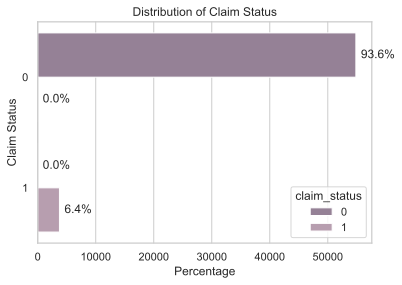

In [11]:
# Identifying a class imbalance
total = len(df)

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, y='claim_status', hue='claim_status', palette=['#987D9A', '#BB9AB1'])

# Calculate and annotate percentages
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar (count)
    percentage = (width / total) * 100  # Calculate the percentage
    ax.annotate(f'{percentage:.1f}%', 
                xy=(width, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                ha='left', 
                va='center')

plt.xlabel('Percentage')
plt.ylabel('Claim Status')
plt.title('Distribution of Claim Status')
plt.show()

In this dataset, there is a significant class imbalance, which may affect the model's ability to learn properly and accurately classify instances.

To address the class imbalance issue, we will explore resampling techniques during model training. Resampling involves modifying the distribution of the training data to balance the classes.

**Two common resampling techniques are:**

   1) **Oversampling**: This involves increasing the number of instances in the minority class by duplicating or creating synthetic      samples. Popular oversampling methods include Random Oversampling and Synthetic Minority Over-sampling Technique (SMOTE).
   
  2)   **Undersampling:** This involves reducing the number of instances in the majority class by randomly removing samples. Common    undersampling methods include Random Undersampling and Tomek Links.

In [12]:
# There are only 3 numerical columns. Others are all categorical.
# Selecting the numerical columns from the DataFrame and storing their column names in a variable
numerical_columns = df[['subscription_length', 'vehicle_age', 'customer_age']].columns

# Displaying the column names of the selected numerical columns
numerical_columns

Index(['subscription_length', 'vehicle_age', 'customer_age'], dtype='object')

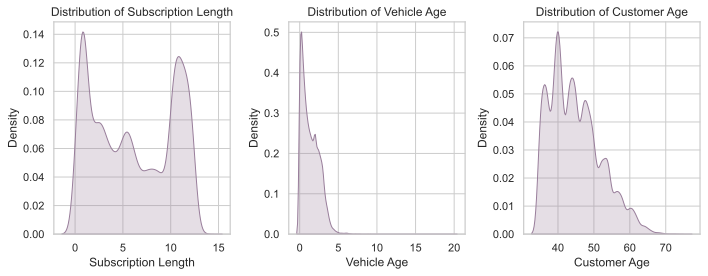

In [13]:
# plotting distributions of numerical features
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_columns, 1): #
    plt.subplot(len(numerical_columns) // 3, 3, i)
    sns.kdeplot(df[col], fill = True, color = '#987D9A') 
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')

plt.tight_layout()
plt.show()

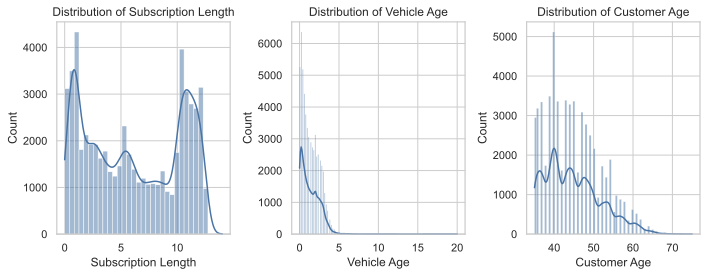

In [14]:
# Creating subplots to visualize the distribution of numerical columns
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, color='#4974a5', kde=True)
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

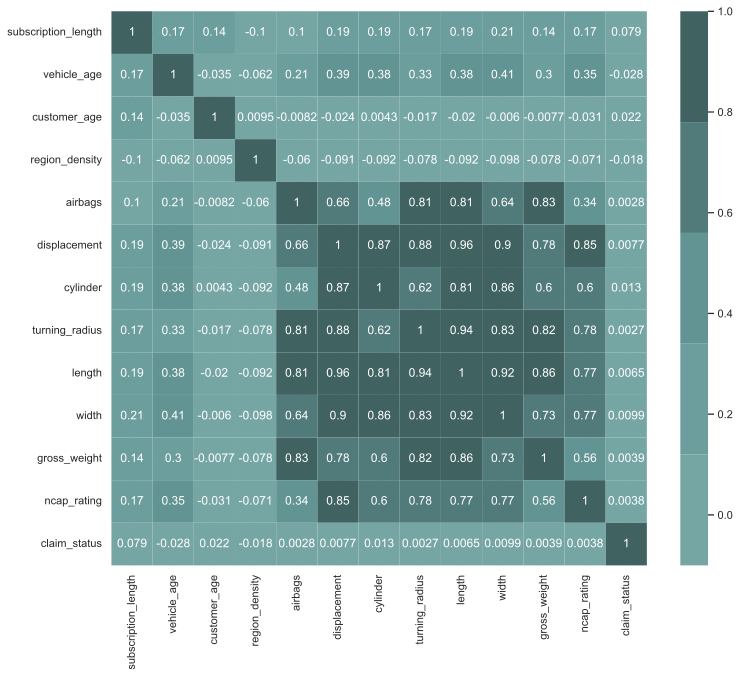

In [15]:
# Creating a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap=['#76A6A4', '#6B9E9D', '#619492', '#517B7A', '#406362'])
plt.show()

In [16]:
# Specifying a list of categorical columns
categorical_columns = ['region_code', 'segment', 'fuel_type']

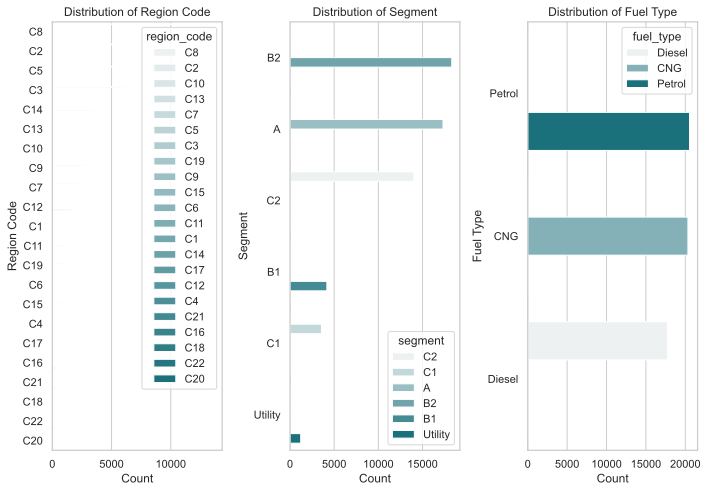

In [17]:
# Creating subplots to visualize the distribution of categorical columns
plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=col, color='#0a7e8c')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel('Count')
    plt.ylabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

# Oversampling the Minority Class

In [18]:
# Creating subsets of the DataFrame based on the 'claim_status' column:
# - 'minority' contains rows where 'claim_status' is equal to 1
# - 'majority' contains rows where 'claim_status' is equal to 0
minority = df[df['claim_status'] == 1]
majority = df[df['claim_status'] == 0]

In [19]:
majority.head()

subscription_length  vehicle_age  customer_age region_code  region_density  \
0                  9.3          1.2            41          C8            8794   
1                  8.2          1.8            35          C2           27003   
2                  9.5          0.2            44          C8            8794   
3                  5.2          0.4            44         C10           73430   
4                 10.1          1.0            56         C13            5410   

  segment model fuel_type     max_torque          max_power  ...  \
0      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm  ...   
1      C1    M9    Diesel  200Nm@1750rpm   97.89bhp@3600rpm  ...   
2      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm  ...   
3       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
4      B2    M5    Diesel  200Nm@3000rpm   88.77bhp@4000rpm  ...   

  is_brake_assist  is_power_door_locks is_central_locking is_power_steering  \
0             Yes                  Yes                Yes               Yes   
1              No                  Yes                Yes               Yes   
2             Yes                  Yes                Yes               Yes   
3              No                   No                 No               Yes   
4              No                  Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                              Yes                            No    Yes   
1                              Yes                           Yes    Yes   
2                              Yes                            No    Yes   
3                               No                            No     No   
4                               No                            No    Yes   

  is_speed_alert  ncap_rating  claim_status  
0            Yes            3             0  
1            Yes            4             0  
2            Yes            3             0  
3            Yes            0             0  
4            Yes            5             0  

[5 rows x 40 columns]

In [20]:
# Oversampling the minority class to balance the dataset
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

In [21]:
# Concatenating the majority class with the oversampled minority class to create a balanced dataset
oversampled_data = pd.concat([majority, minority_oversampled])
oversampled_data.head()

subscription_length  vehicle_age  customer_age region_code  region_density  \
0                  9.3          1.2            41          C8            8794   
1                  8.2          1.8            35          C2           27003   
2                  9.5          0.2            44          C8            8794   
3                  5.2          0.4            44         C10           73430   
4                 10.1          1.0            56         C13            5410   

  segment model fuel_type     max_torque          max_power  ...  \
0      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm  ...   
1      C1    M9    Diesel  200Nm@1750rpm   97.89bhp@3600rpm  ...   
2      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm  ...   
3       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
4      B2    M5    Diesel  200Nm@3000rpm   88.77bhp@4000rpm  ...   

  is_brake_assist  is_power_door_locks is_central_locking is_power_steering  \
0             Yes                  Yes                Yes               Yes   
1              No                  Yes                Yes               Yes   
2             Yes                  Yes                Yes               Yes   
3              No                   No                 No               Yes   
4              No                  Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                              Yes                            No    Yes   
1                              Yes                           Yes    Yes   
2                              Yes                            No    Yes   
3                               No                            No     No   
4                               No                            No    Yes   

  is_speed_alert  ncap_rating  claim_status  
0            Yes            3             0  
1            Yes            4             0  
2            Yes            3             0  
3            Yes            0             0  
4            Yes            5             0  

[5 rows x 40 columns]

In [22]:
# Counting the number of occurrences of each class in the 'claim_status' column
oversampled_data['claim_status'].value_counts()

0    54844
1    54844
Name: claim_status, dtype: int64

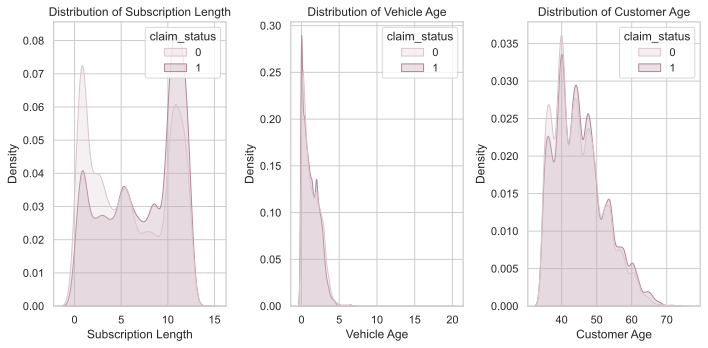

In [23]:
# Creating subplots to visualize the distribution of numerical columns with KDE plots
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=oversampled_data, x=col, hue='claim_status', fill=True, palette=['#d9c4cd', '#b18699'])
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

# Conclusion
The distribution of the claim_status target variable after oversampling is as follows:

**Class 0:** 54844 instances

**Class 1:** 54844 instances

** **
This balanced distribution indicates that the oversampling technique has effectively addressed the class imbalance issue in the dataset. With an equal number of instances for both classes, we can now proceed to train our predictive model on the balanced dataset, ensuring that both classes are adequately represented and the model can learn from both types of instances effectively.

# Feature Engineering

In this section, we'll address the need to preprocess categorical variables in our dataset before training machine learning models. Many machine learning algorithms require numerical input, which means we need to convert categorical variables into a numerical format. One common technique for achieving this is using the LabelEncoder from the scikit-learn library. The LabelEncoder converts categorical labels into numerical labels, allowing us to represent categorical data numerically. We'll initialize a LabelEncoder object and apply it to each column in our dataset where the data type is 'object', effectively transforming categorical variables into a format suitable for model training. Let's dive into the code and preprocess our data using LabelEncoder!

In [24]:
# Initialize a LabelEncoder
labenc = LabelEncoder()

# Apply LabelEncoder to each column if the column dtype is 'object', else keep the column as is
encoded_data = df.apply(lambda col: labenc.fit_transform(col) if col.dtype == 'object' else col)

In [25]:
encoded_data.head()

subscription_length  vehicle_age  customer_age  region_code  \
0                  9.3          1.2            41           20   
1                  8.2          1.8            35           11   
2                  9.5          0.2            44           20   
3                  5.2          0.4            44            1   
4                 10.1          1.0            56            4   

   region_density  segment  model  fuel_type  max_torque  max_power  ...  \
0            8794        4      5          1           4          0  ...   
1           27003        3     10          1           2          8  ...   
2            8794        4      5          1           4          0  ...   
3           73430        0      0          0           5          2  ...   
4            5410        2      6          1           3          7  ...   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                1                    1                   1   
1                0                    1                   1   
2                1                    1                   1   
3                0                    0                   0   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 1   
1                  1                                 1   
2                  1                                 1   
3                  1                                 0   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       1               1            3   
1                              1       1               1            4   
2                              0       1               1            3   
3                              0       0               1            0   
4                              0       1               1            5   

   claim_status  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 40 columns]

In [26]:
# Separating features (X) and target variable (y)
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [27]:
# Instantiate the Random Forest classifier with a random state of 42
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [28]:
# Get feature importances from the trained Random Forest model
feature_importance = rf_model.feature_importances_

In [29]:
# Create a DataFrame to store feature names and their corresponding importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
features_df.head(10)

Feature  Importance
0   subscription_length    0.417150
2          customer_age    0.263397
1           vehicle_age    0.193724
4        region_density    0.059310
3           region_code    0.058201
6                 model    0.000672
23               length    0.000639
24                width    0.000591
22       turning_radius    0.000504
25         gross_weight    0.000491

# Conclusion

**Based on the feature importance analysis, it is evident that:** 

**subscription_length:**  0.417150
** ** 
**customer_age:**  0.263397
** ** 
**vehicle_age:**  0.193724
** ** 
**region_density** : 0.059310
****
**region_code:** 0.058201
** **
These results indicate that subscription length, customer age, and vehicle age are the most influential features in predicting insurance claims likelihood. Factors such as region density and region code also contribute to the predictive power, albeit to a lesser extent. Understanding and considering these key features can aid insurers in accurately assessing risk and allocating resources effectively.

In [30]:
# Separating features (X) and target variable (y) from the oversampled dataset
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

In [31]:
# Apply LabelEncoder to each column if the column dtype is 'object', else keep the column as is
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Data Splitting

In [32]:
# Splitting the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.4, random_state=42)

# Model Training

In [33]:
# Instantiate the Random Forest classifier with a random state of 42
rf_model_oversampled = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Predicting the target variable for the test set using the trained model
y_pred = rf_model_oversampled.predict(X_test)

In [35]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     21994
           1       0.95      1.00      0.97     21882

    accuracy                           0.97     43876
   macro avg       0.97      0.97      0.97     43876
weighted avg       0.97      0.97      0.97     43876



# Conclusion

Based on the classification report, our predictive model for insurance claims likelihood assessment demonstrates excellent performance across various evaluation metrics. With a precision of 1.00 for class 0 and 0.95 for class 1, the model achieves high accuracy in predicting both positive and negative instances. Moreover, the recall score of 0.95 for class 0 and 1.00 for class 1 indicates the model's ability to effectively capture true positive instances while minimizing false negatives. The balanced f1-score of 0.97 for both classes further validates the model's robustness in terms of precision and recall. Overall, with an accuracy of 0.97, the model showcases strong predictive capabilities, making it a reliable tool for insurers to assess insurance claims likelihood accurately. This performance underscores the effectiveness of our predictive modeling approach and its potential to contribute to more informed decision-making in the insurance industry.

# Model Evaluation

In this section, we'll thoroughly evaluate the performance of our predictive model for insurance claims likelihood assessment. Evaluating the model is essential to understand its effectiveness, generalization ability, and potential limitations. We'll use a variety of evaluation metrics to assess different aspects of the model's performance, including accuracy, precision, recall, F1-score, and ROC-AUC. These metrics provide insights into how well the model predicts both positive and negative instances, its ability to minimize false positives and false negatives, and its overall discriminative power. By comprehensively evaluating the model, we aim to gain a deeper understanding of its strengths and weaknesses, identify areas for improvement, and ultimately make informed decisions about its deployment in real-world applications. Let's delve into the model evaluation process and analyze the performance of our predictive model!

In [36]:
# Create a DataFrame to store the top 5 most important features and their importances
importance_df = pd.DataFrame({
    'Column': list(map(lambda col: ' '.join(map(str.title, col.split('_'))), X_oversampled_encoded.columns)),
    'Importance': rf_model_oversampled.feature_importances_
}).sort_values(by='Importance', ascending=False).head(5)

In [37]:
# Set up the figure and plot the treemap
plt.figure(figsize=(5, 5))
squarify.plot(sizes=importance_df['Importance'], label=importance_df['Column'], color='#D1BB9E', edgecolor='white')

# Add title
plt.title('Feature Importance')

# Show the plot
plt.show()

NameError: name 'squarify' is not defined

<Figure size 500x500 with 0 Axes>

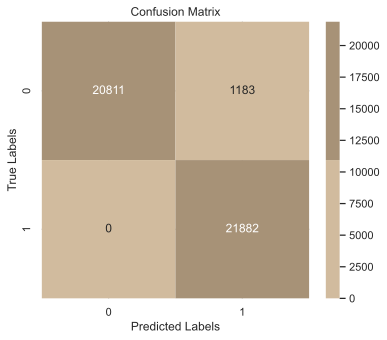

In [38]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=['#D1BB9E', '#A79277'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9730376515634971


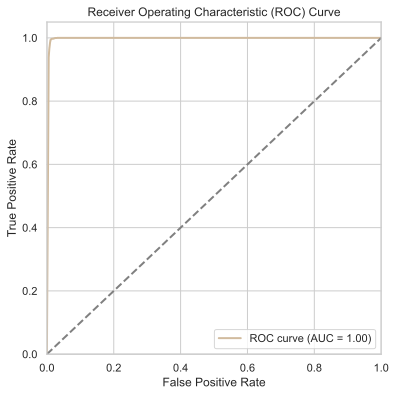

In [40]:
y_probs = rf_model_oversampled.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='#D1BB9E', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
# Perform k-fold cross-validation
scores = cross_val_score(rf_model_oversampled, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Mean Accuracy: 0.9660092490100773
Standard Deviation of Accuracy: 0.0010790552679904987


## Mean Accuracy: 0.9660092490100773

## Standard Deviation of Accuracy: 0.0010790552679904987

## Applying Pretrained Model for Prediction
** **
In this section, we'll apply the pretrained model to the original test data to generate predictions for insurance claims likelihood. After training and fine-tuning our model on the training data, it's crucial to evaluate its performance on unseen data to assess its generalization ability. We'll use the imbalanced test data, which contains instances that the model has not seen during training, to make predictions. Subsequently, we'll compare the predicted labels with the actual labels to evaluate the model's accuracy. This analysis will provide insights into how well our model performs in real-world scenarios and its effectiveness in accurately identifying insurance claims likelihood. Let's proceed with applying the pretrained model and evaluating its performance!

In [43]:
# Create a copy of the original DataFrame
original_encoded = df.copy()

# Initialize a dictionary to store the encoders
encoders = {}

# Iterate over categorical columns and create LabelEncoders
for col in X_oversampled.select_dtypes(include=['object']).columns:
    encoders[col] = LabelEncoder().fit(X_oversampled[col])

In [44]:
# Printing the dictionary containing fitted LabelEncoders for each categorical column
encoders

{'region_code': LabelEncoder(),
 'segment': LabelEncoder(),
 'model': LabelEncoder(),
 'fuel_type': LabelEncoder(),
 'max_torque': LabelEncoder(),
 'max_power': LabelEncoder(),
 'engine_type': LabelEncoder(),
 'is_esc': LabelEncoder(),
 'is_adjustable_steering': LabelEncoder(),
 'is_tpms': LabelEncoder(),
 'is_parking_sensors': LabelEncoder(),
 'is_parking_camera': LabelEncoder(),
 'rear_brakes_type': LabelEncoder(),
 'transmission_type': LabelEncoder(),
 'steering_type': LabelEncoder(),
 'is_front_fog_lights': LabelEncoder(),
 'is_rear_window_wiper': LabelEncoder(),
 'is_rear_window_washer': LabelEncoder(),
 'is_rear_window_defogger': LabelEncoder(),
 'is_brake_assist': LabelEncoder(),
 'is_power_door_locks': LabelEncoder(),
 'is_central_locking': LabelEncoder(),
 'is_power_steering': LabelEncoder(),
 'is_driver_seat_height_adjustable': LabelEncoder(),
 'is_day_night_rear_view_mirror': LabelEncoder(),
 'is_ecw': LabelEncoder(),
 'is_speed_alert': LabelEncoder()}

In [45]:
# Transforming categorical columns in the original encoded dataset using fitted LabelEncoders
for col in original_encoded.select_dtypes(include='object').columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

# Making predictions on the transformed dataset using the trained model
original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

In [46]:
# Create a DataFrame to compare actual and predicted values of the 'claim_status' column
comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

# Display the DataFrame
comparison_df

Actual  Predicted
0           0          0
1           0          0
2           0          0
3           0          1
4           0          0
...       ...        ...
58587       0          0
58588       0          0
58589       0          0
58590       0          0
58591       0          0

[58592 rows x 2 columns]

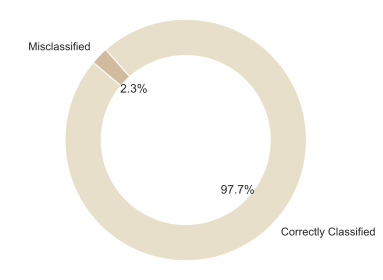

In [47]:
# Calculate the counts of correctly and incorrectly classified samples
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

# Store the counts in a list
classification_counts = [correctly_classified, incorrectly_classified]

# Define labels for the counts
labels = ['Correctly Classified', 'Misclassified']

# Create a pie chart
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#E8DFCA', '#D1BB9E'])

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

In [48]:
import streamlit as st

In [49]:
import joblib

In [50]:
joblib.dump(rf_model_oversampled,'claim_staus_model')

['claim_staus_model']

In [51]:
%%writefile app.py
import streamlit as st 
import joblib
import numpy as np

# Load your trained model
claim_staus_model = joblib.load('claim_status_joblib')

# Title of the app
st.title("Claim Status Prediction")

# Sidebar for user input
st.sidebar.header("Input Parameters")

# Create input fields for each feature
subscription_length = st.sidebar.number_input("Subscription Length", min_value=0, max_value=100, value=12)
vehicle_age = st.sidebar.number_input("Vehicle Age", min_value=0, max_value=20, value=5)
customer_age = st.sidebar.number_input("Customer Age", min_value=18, max_value=100, value=30)
region_code = st.sidebar.number_input("Region Code", min_value=0, max_value=50, value=10)
region_density = st.sidebar.number_input("Region Density", min_value=0, max_value=10, value=5)
segment = st.sidebar.number_input("Segment", min_value=0, max_value=10, value=3)
model = st.sidebar.number_input("Model", min_value=0, max_value=100, value=50)
fuel_type = st.sidebar.number_input("Fuel Type", min_value=0, max_value=10, value=1)
max_torque = st.sidebar.number_input("Max Torque", min_value=0, max_value=1000, value=200)
max_power = st.sidebar.number_input("Max Power", min_value=0, max_value=1000, value=150)
engine_type = st.sidebar.number_input("Engine Type", min_value=0, max_value=10, value=3)
airbags = st.sidebar.number_input("Airbags", min_value=0, max_value=10, value=2)
is_esc = st.sidebar.number_input("Is ESC", min_value=0, max_value=1, value=1)
is_adjustable_steering = st.sidebar.number_input("Is Adjustable Steering", min_value=0, max_value=1, value=1)
is_tpms = st.sidebar.number_input("Is TPMS", min_value=0, max_value=1, value=1)
is_parking_sensors = st.sidebar.number_input("Is Parking Sensors", min_value=0, max_value=1, value=1)
is_parking_camera = st.sidebar.number_input("Is Parking Camera", min_value=0, max_value=1, value=1)
rear_brakes_type = st.sidebar.number_input("Rear Brakes Type", min_value=0, max_value=10, value=3)
displacement = st.sidebar.number_input("Displacement", min_value=0, max_value=10000, value=1500)
cylinder = st.sidebar.number_input("Cylinder", min_value=0, max_value=12, value=4)
transmission_type = st.sidebar.number_input("Transmission Type", min_value=0, max_value=10, value=2)
steering_type = st.sidebar.number_input("Steering Type", min_value=0, max_value=10, value=3)
turning_radius = st.sidebar.number_input("Turning Radius", min_value=0, max_value=20, value=5)
length = st.sidebar.number_input("Length", min_value=0, max_value=10000, value=4500)
width = st.sidebar.number_input("Width", min_value=0, max_value=3000, value=1800)
gross_weight = st.sidebar.number_input("Gross Weight", min_value=0, max_value=10000, value=1500)
is_front_fog_lights = st.sidebar.number_input("Is Front Fog Lights", min_value=0, max_value=1, value=1)
is_rear_window_wiper = st.sidebar.number_input("Is Rear Window Wiper", min_value=0, max_value=1, value=1)
is_rear_window_washer = st.sidebar.number_input("Is Rear Window Washer", min_value=0, max_value=1, value=1)
is_rear_window_defogger = st.sidebar.number_input("Is Rear Window Defogger", min_value=0, max_value=1, value=1)
is_brake_assist = st.sidebar.number_input("Is Brake Assist", min_value=0, max_value=1, value=1)
is_power_door_locks = st.sidebar.number_input("Is Power Door Locks", min_value=0, max_value=1, value=1)
is_central_locking = st.sidebar.number_input("Is Central Locking", min_value=0, max_value=1, value=1)
is_power_steering = st.sidebar.number_input("Is Power Steering", min_value=0, max_value=1, value=1)
is_driver_seat_height_adjustable = st.sidebar.number_input("Is Driver Seat Height Adjustable", min_value=0, max_value=1, value=1)
is_day_night_rear_view_mirror = st.sidebar.number_input("Is Day Night Rear View Mirror", min_value=0, max_value=1, value=1)
is_ecw = st.sidebar.number_input("Is ECW", min_value=0, max_value=1, value=1)
is_speed_alert = st.sidebar.number_input("Is Speed Alert", min_value=0, max_value=1, value=1)
ncap_rating = st.sidebar.number_input("NCAP Rating", min_value=0, max_value=5, value=4)

# Collecting all the features into a single array
input_features = np.array([[subscription_length, vehicle_age, customer_age, region_code,
                            region_density, segment, model, fuel_type, max_torque,
                            max_power, engine_type, airbags, is_esc,
                            is_adjustable_steering, is_tpms, is_parking_sensors,
                            is_parking_camera, rear_brakes_type, displacement, cylinder,
                            transmission_type, steering_type, turning_radius, length,
                            width, gross_weight, is_front_fog_lights, is_rear_window_wiper,
                            is_rear_window_washer, is_rear_window_defogger, is_brake_assist,
                            is_power_door_locks, is_central_locking, is_power_steering,
                            is_driver_seat_height_adjustable, is_day_night_rear_view_mirror,
                            is_ecw, is_speed_alert, ncap_rating]])

# Predict using the loaded model
if st.sidebar.button("Predict"):
    prediction = claim_staus_model.predict(input_features)
    st.write(f"The predicted claim status is: {prediction[0]}")


Overwriting app.py
